C:\Users\skills\AppData\Local\Temp\ipykernel_5900\2326659102.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


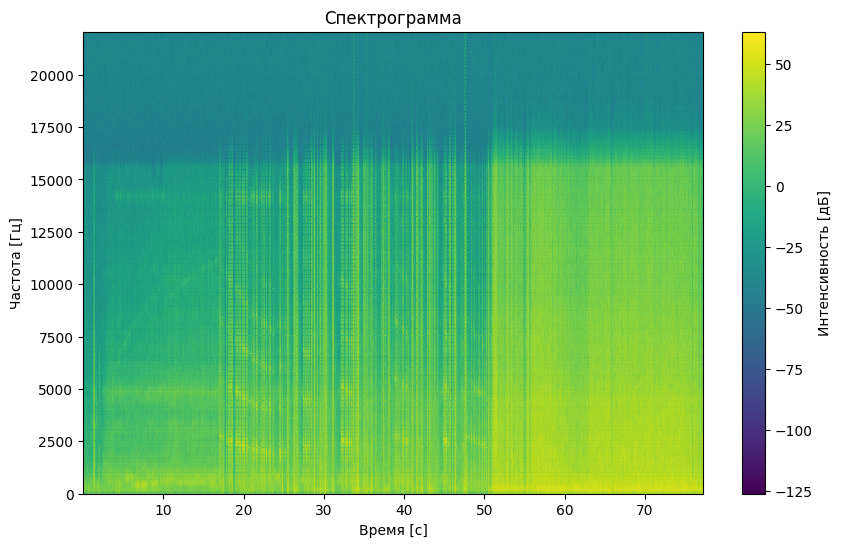

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

# Загрузка WAV файла
file_path = r'C:\Users\skills\Downloads\Модуль 2\training_datasets\audio.wav'  # Укажите путь к вашему WAV файлу
sample_rate, data = wavfile.read(file_path)

# Проверка, если сигнал стерео, то преобразуем в моно
if len(data.shape) > 1:
    data = data.mean(axis=1)

# Генерация спектрограммы
f, t, Sxx = signal.spectrogram(x, sample_rate)

# Визуализация спектрограммы
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [с]')
plt.title('Спектрограмма')
plt.colorbar(label='Интенсивность [дБ]')
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Загрузка WAV файла
file_path = r'C:\Users\skills\Downloads\Модуль 2\training_datasets\audio.wav'  # Укажите путь к вашему WAV файлу
sample_rate, data = wavfile.read(file_path)

# Проверка, если сигнал стерео, то преобразуем в моно
if len(data.shape) > 1:
    data = data.mean(axis=1)

C:\Users\skills\AppData\Local\Temp\ipykernel_5900\3470157585.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


In [11]:
# Выполняем преобразование Фурье
fft_result = np.fft.fft(data)
fft_magnitude = np.abs(fft_result)

# Создание частотной оси
frequencies = np.fft.fftfreq(len(fft_result), 1/sample_rate)

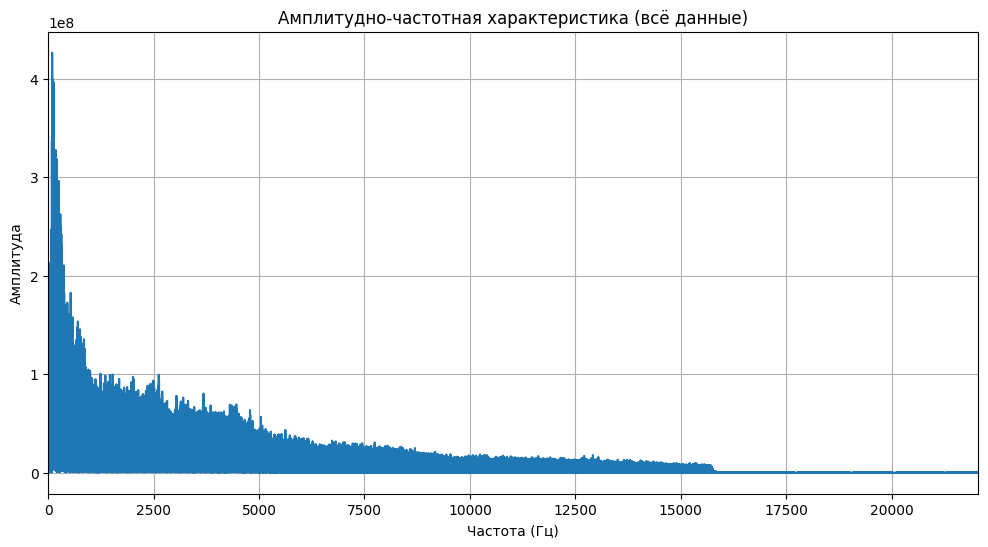

In [12]:
# Построение АЧХ для всего набора данных
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], fft_magnitude[:len(fft_magnitude)//2])
plt.title('Амплитудно-частотная характеристика (все данные)')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid()
plt.xlim(0, sample_rate/2)  # Ограничиваем ось X до половины частоты дискретизации
plt.show()

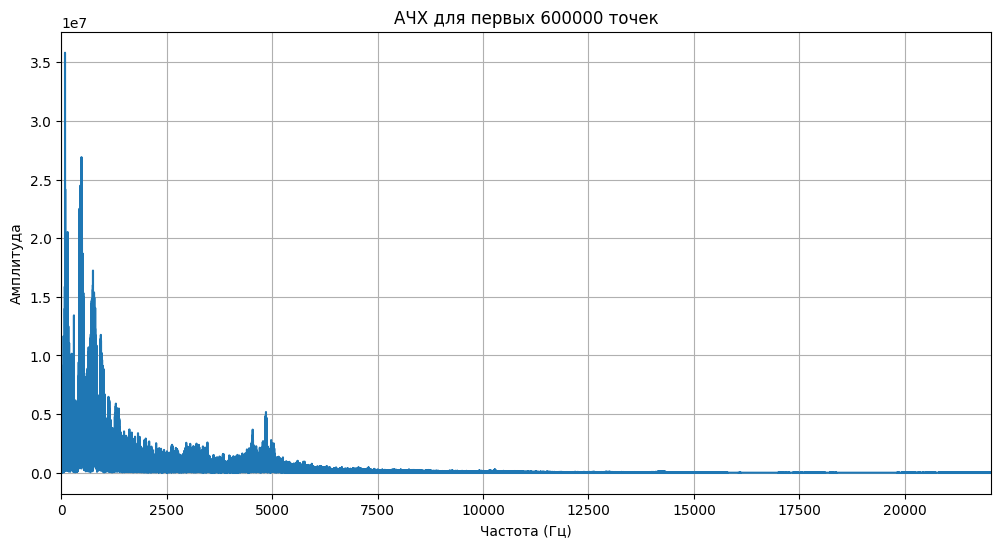

In [13]:
# Построение АЧХ для первых 600000 точек
if len(data) >= 600000:
    fft_first_600k = np.fft.fft(data[:600000])
    fft_magnitude_first_600k = np.abs(fft_first_600k)
    frequencies_first_600k = np.fft.fftfreq(len(fft_first_600k), 1/sample_rate)

    plt.figure(figsize=(12, 6))
    plt.plot(frequencies_first_600k[:len(frequencies_first_600k)//2], fft_magnitude_first_600k[:len(fft_magnitude_first_600k)//2])
    plt.title('АЧХ для первых 600000 точек')
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.xlim(0, sample_rate/2)
    plt.show()

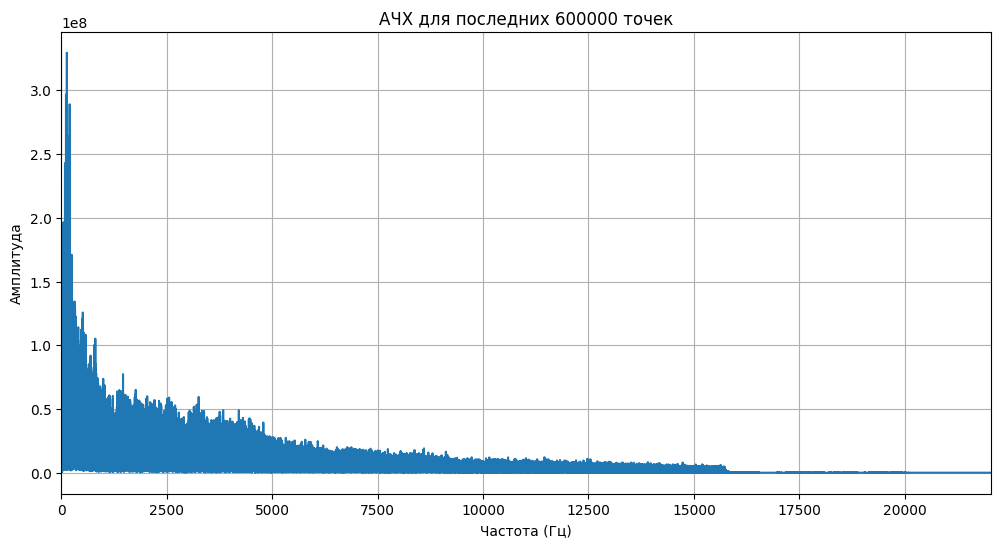

In [14]:
# Построение АЧХ для последних 600000 точек
if len(data) >= 600000:
    fft_last_600k = np.fft.fft(data[-600000:])
    fft_magnitude_last_600k = np.abs(fft_last_600k)
    frequencies_last_600k = np.fft.fftfreq(len(fft_last_600k), 1/sample_rate)

    plt.figure(figsize=(12, 6))
    plt.plot(frequencies_last_600k[:len(frequencies_last_600k)//2], fft_magnitude_last_600k[:len(fft_magnitude_last_600k)//2])
    plt.title('АЧХ для последних 600000 точек')
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.xlim(0, sample_rate/2)
    plt.show()